In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from collections import defaultdict

# Data Preparation

In [10]:
df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df4= pd.merge(df2, df1, how='outer')
df_m=pd.merge(df4, df3, how='outer')

df = df_m.set_index(['date'])

In [11]:
from data_preparation import prepare_dataset

In [12]:
class_name = 'Occupancy'
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [13]:
data = df['CO2']

samples = list()
length = 80
# step over the 5,000 in jumps of 200
for i in range(0,20560,length):

    sample = data[i:i+length]
    samples.append(sample)
print(len(samples),type(samples))

X = np.array(samples)
X.shape

257 <class 'list'>


(257, 80)

In [14]:
y = np.array([0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2])

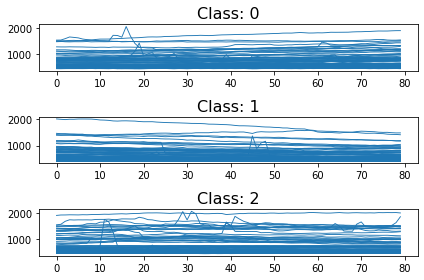

In [7]:
plt.figure()
for i, classe in enumerate([0,1,2]):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()

plt.show()

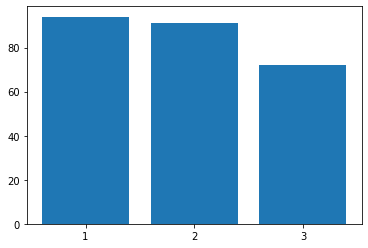

In [8]:
hist, bins = np.histogram(y, 
                          bins=range(0, len(set(y)) + 1))
dict(zip(bins, hist))
x = np.linspace(1,3,3,endpoint=True)
plt.xticks(np.linspace(0,3,4,endpoint=True))
plt.bar(x,hist)
plt.show()

NORMALIZATION

In [5]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

PARTITIONING

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(179, 80) (78, 80) (179,) (78,)


# CLASSIFIERS

##### SHAPELET CLASSIFIER

In [14]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 179
ts_sz 80
n_classes 3
shapelet_sizes {8: 4}


In [15]:
#with sgd optimizer
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [16]:
shp_clf.fit(X_train, y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
179/179 [==============================] - 0s 2ms/step - loss: 1.1280 - categorical_accuracy: 0.3799 - categorical_crossentropy: 1.0988
Epoch 2/200
179/179 [==============================] - 0s 259us/step - loss: 1.1280 - categorical_accuracy: 0.3799 - categorical_crossentropy: 1.0987
Epoch 3/200
179/179 [==============================] - 0s 201us/step - loss: 1.1279 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0987
Epoch 4/200
179/179 [==============================] - 0s 237us/step - loss: 1.1279 - categorical_accuracy: 0.3911 - categorical_crossentropy: 1.0986
Epoch 5/200
179/179 [==============================] - 0s 45us/step - loss: 1.1278 - categorical_accuracy: 0.3911 - categorical_crossentropy: 1.0986
Epoch 6/200
179/179 [==============================] - 0s 134us/step - loss: 

Epoch 50/200
179/179 [==============================] - 0s 157us/step - loss: 1.1259 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0972
Epoch 51/200
179/179 [==============================] - 0s 179us/step - loss: 1.1259 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0972
Epoch 52/200
179/179 [==============================] - 0s 112us/step - loss: 1.1259 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0972
Epoch 53/200
179/179 [==============================] - 0s 112us/step - loss: 1.1258 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0972
Epoch 54/200
179/179 [==============================] - 0s 134us/step - loss: 1.1258 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0971
Epoch 55/200
179/179 [==============================] - 0s 203us/step - loss: 1.1258 - categorical_accuracy: 0.3855 - categorical_crossentropy: 1.0971
Epoch 56/200
179/179 [==============================] - 0s 45us/step - loss: 1.1257 - categori

Epoch 105/200
179/179 [==============================] - 0s 67us/step - loss: 1.1241 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0960
Epoch 106/200
179/179 [==============================] - 0s 45us/step - loss: 1.1240 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0960
Epoch 107/200
179/179 [==============================] - 0s 112us/step - loss: 1.1240 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0960
Epoch 108/200
179/179 [==============================] - 0s 45us/step - loss: 1.1240 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0959
Epoch 109/200
179/179 [==============================] - 0s 45us/step - loss: 1.1240 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0959
Epoch 110/200
179/179 [==============================] - 0s 156us/step - loss: 1.1239 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0959
Epoch 111/200
179/179 [==============================] - 0s 134us/step - loss: 1.1239 - cate

179/179 [==============================] - 0s 45us/step - loss: 1.1226 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 160/200
179/179 [==============================] - 0s 67us/step - loss: 1.1226 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 161/200
179/179 [==============================] - 0s 22us/step - loss: 1.1226 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 162/200
179/179 [==============================] - 0s 22us/step - loss: 1.1225 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 163/200
179/179 [==============================] - 0s 134us/step - loss: 1.1225 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 164/200
179/179 [==============================] - 0s 45us/step - loss: 1.1225 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0951
Epoch 165/200
179/179 [==============================] - 0s 112us/step - loss: 1.1225 - categorical_accurac

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={8: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [17]:
# with adagrad optimizer
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="Adadelta",
                        weight_regularizer=.00001,
                        max_iter=300,
                        verbose=1)

In [18]:
shp_clf.fit(X_train, y_train)

Epoch 1/300
179/179 [==============================] - 0s 2ms/step - loss: 1.0990 - categorical_accuracy: 0.2793 - categorical_crossentropy: 1.0990
Epoch 2/300
179/179 [==============================] - 0s 201us/step - loss: 1.0988 - categorical_accuracy: 0.3073 - categorical_crossentropy: 1.0988
Epoch 3/300
179/179 [==============================] - 0s 45us/step - loss: 1.0986 - categorical_accuracy: 0.3575 - categorical_crossentropy: 1.0986
Epoch 4/300
179/179 [==============================] - 0s 23us/step - loss: 1.0985 - categorical_accuracy: 0.3464 - categorical_crossentropy: 1.0984
Epoch 5/300
179/179 [==============================] - 0s 45us/step - loss: 1.0983 - categorical_accuracy: 0.3631 - categorical_crossentropy: 1.0983
Epoch 6/300
179/179 [==============================] - 0s 147us/step - loss: 1.0981 - categorical_accuracy: 0.3799 - categorical_crossentropy: 1.0981
Epoch 7/300
179/179 [==============================] - 0s 45us/step - loss: 1.0980 - categorical_accuracy

Epoch 56/300
179/179 [==============================] - 0s 89us/step - loss: 1.0928 - categorical_accuracy: 0.3631 - categorical_crossentropy: 1.0928
Epoch 57/300
179/179 [==============================] - 0s 134us/step - loss: 1.0927 - categorical_accuracy: 0.3631 - categorical_crossentropy: 1.0927
Epoch 58/300
179/179 [==============================] - 0s 45us/step - loss: 1.0927 - categorical_accuracy: 0.3520 - categorical_crossentropy: 1.0926
Epoch 59/300
179/179 [==============================] - 0s 201us/step - loss: 1.0926 - categorical_accuracy: 0.3575 - categorical_crossentropy: 1.0926
Epoch 60/300
179/179 [==============================] - 0s 112us/step - loss: 1.0925 - categorical_accuracy: 0.3575 - categorical_crossentropy: 1.0925
Epoch 61/300
179/179 [==============================] - 0s 45us/step - loss: 1.0925 - categorical_accuracy: 0.3687 - categorical_crossentropy: 1.0925
Epoch 62/300
179/179 [==============================] - 0s 134us/step - loss: 1.0924 - categorica

Epoch 111/300
179/179 [==============================] - 0s 192us/step - loss: 1.0906 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0906
Epoch 112/300
179/179 [==============================] - 0s 22us/step - loss: 1.0906 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0905
Epoch 113/300
179/179 [==============================] - 0s 67us/step - loss: 1.0905 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0905
Epoch 114/300
179/179 [==============================] - 0s 45us/step - loss: 1.0905 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0905
Epoch 115/300
179/179 [==============================] - 0s 128us/step - loss: 1.0905 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0904
Epoch 116/300
179/179 [==============================] - 0s 112us/step - loss: 1.0904 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0904
Epoch 117/300
179/179 [==============================] - 0s 112us/step - loss: 1.0904 - cat

Epoch 166/300
179/179 [==============================] - 0s 134us/step - loss: 1.0893 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0893
Epoch 167/300
179/179 [==============================] - 0s 45us/step - loss: 1.0893 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0892
Epoch 168/300
179/179 [==============================] - 0s 45us/step - loss: 1.0892 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0892
Epoch 169/300
179/179 [==============================] - 0s 45us/step - loss: 1.0892 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0892
Epoch 170/300
179/179 [==============================] - 0s 22us/step - loss: 1.0892 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0892
Epoch 171/300
179/179 [==============================] - 0s 201us/step - loss: 1.0892 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0892
Epoch 172/300
179/179 [==============================] - 0s 45us/step - loss: 1.0892 - categ

179/179 [==============================] - 0s 157us/step - loss: 1.0880 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0880
Epoch 221/300
179/179 [==============================] - 0s 67us/step - loss: 1.0880 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0880
Epoch 222/300
179/179 [==============================] - 0s 22us/step - loss: 1.0880 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0879
Epoch 223/300
179/179 [==============================] - 0s 89us/step - loss: 1.0880 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0879
Epoch 224/300
179/179 [==============================] - 0s 178us/step - loss: 1.0879 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0879
Epoch 225/300
179/179 [==============================] - 0s 156us/step - loss: 1.0879 - categorical_accuracy: 0.3743 - categorical_crossentropy: 1.0879
Epoch 226/300
179/179 [==============================] - 0s 201us/step - loss: 1.0879 - categorical_accur

Epoch 275/300
179/179 [==============================] - 0s 45us/step - loss: 1.0856 - categorical_accuracy: 0.4525 - categorical_crossentropy: 1.0856
Epoch 276/300
179/179 [==============================] - 0s 156us/step - loss: 1.0856 - categorical_accuracy: 0.4581 - categorical_crossentropy: 1.0855
Epoch 277/300
179/179 [==============================] - 0s 398us/step - loss: 1.0855 - categorical_accuracy: 0.4637 - categorical_crossentropy: 1.0855
Epoch 278/300
179/179 [==============================] - 0s 112us/step - loss: 1.0854 - categorical_accuracy: 0.4693 - categorical_crossentropy: 1.0854
Epoch 279/300
179/179 [==============================] - 0s 112us/step - loss: 1.0854 - categorical_accuracy: 0.4693 - categorical_crossentropy: 1.0853
Epoch 280/300
179/179 [==============================] - 0s 28us/step - loss: 1.0853 - categorical_accuracy: 0.4749 - categorical_crossentropy: 1.0853
Epoch 281/300
179/179 [==============================] - 0s 134us/step - loss: 1.0852 - ca

ShapeletModel(batch_size=256, max_iter=300, n_shapelets_per_size={8: 4},
              optimizer='Adadelta', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=1e-05)

In [19]:
# ho provato con diversi ottimizzatori keras e facendo variare altri parametri ma l'accuracy non supera mai 0.3757

In [19]:
y_pred = shp_clf.predict(X_test)

78/78 [==============================] - 0s 2ms/step


In [20]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.48717948717948717
F1-score [0.58064516 0.5        0.08695652]
              precision    recall  f1-score   support

           0       0.42      0.96      0.58        28
           1       0.83      0.36      0.50        28
           2       1.00      0.05      0.09        22

    accuracy                           0.49        78
   macro avg       0.75      0.46      0.39        78
weighted avg       0.73      0.49      0.41        78



##### SHAPELET-DISTANCE-BASED CLASSIFIER

In [21]:
X_train2 = shp_clf.transform(X_train) # Generate shapelet transform for a set of time series
                                      # from Time series dataset X : array-like of shape=(n_ts, sz, d)
                                      # returns shapelet-Transform of the provided time series array of shape=(n_ts, n_shapelets)

179/179 [==============================] - 0s 908us/step


In [22]:
X_train2.shape

(179, 4)

In [23]:
X_test2 = shp_clf.transform(X_test)

78/78 [==============================] - 0s 56us/step


k-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = {'n_neighbors': np.arange(1, 20 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train2, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
clf = search.best_estimator_
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [28]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [29]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5256410256410257
F1-score [0.53731343 0.57777778 0.45454545]
              precision    recall  f1-score   support

           0       0.46      0.64      0.54        28
           1       0.76      0.46      0.58        28
           2       0.45      0.45      0.45        22

    accuracy                           0.53        78
   macro avg       0.56      0.52      0.52        78
weighted avg       0.57      0.53      0.53        78



Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
hyper_params_space={'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [0]}
tree= DecisionTreeClassifier()
search=GridSearchCV(tree,hyper_params_space)
search.fit(X_train2, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [32]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.44871794871794873
F1-score [0.55172414 0.3902439  0.38596491]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        28
           1       0.62      0.29      0.39        28
           2       0.31      0.50      0.39        22

    accuracy                           0.45        78
   macro avg       0.49      0.45      0.44        78
weighted avg       0.50      0.45      0.45        78



##### Feature-based classifier

In [34]:
import scipy.stats as stats

In [35]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [36]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

In [37]:
X_train3.shape

(179, 13)

In [38]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

In [39]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4230769230769231
F1-score [0.25531915 0.56097561 0.2962963 ]
              precision    recall  f1-score   support

           0       0.32      0.21      0.26        28
           1       0.43      0.82      0.56        28
           2       0.80      0.18      0.30        22

    accuracy                           0.42        78
   macro avg       0.51      0.41      0.37        78
weighted avg       0.49      0.42      0.38        78



In [40]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.41025641025641024
F1-score [0.45714286 0.4137931  0.28571429]
              precision    recall  f1-score   support

           0       0.38      0.57      0.46        28
           1       0.40      0.43      0.41        28
           2       0.67      0.18      0.29        22

    accuracy                           0.41        78
   macro avg       0.48      0.39      0.39        78
weighted avg       0.47      0.41      0.39        78



##### Time serie classifiers

In [41]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5384615384615384
F1-score [0.61538462 0.58461538 0.23076923]
              precision    recall  f1-score   support

           0       0.54      0.71      0.62        28
           1       0.51      0.68      0.58        28
           2       0.75      0.14      0.23        22

    accuracy                           0.54        78
   macro avg       0.60      0.51      0.48        78
weighted avg       0.59      0.54      0.50        78



In [42]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5384615384615384
F1-score [0.53846154 0.625      0.4       ]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        28
           1       0.56      0.71      0.63        28
           2       0.44      0.36      0.40        22

    accuracy                           0.54        78
   macro avg       0.53      0.53      0.52        78
weighted avg       0.53      0.54      0.53        78



In [43]:
#con grid search i risultati non miglioran

In [44]:
from pyts.classification import *

In [45]:
clf= LearningShapelets(random_state=0, tol=0.01)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.358974358974359
F1-score [0.52830189 0.         0.        ]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53        28
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        22

    accuracy                           0.36        78
   macro avg       0.12      0.33      0.18        78
weighted avg       0.13      0.36      0.19        78



C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5897435897435898
F1-score [0.62068966 0.6557377  0.43243243]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        28
           1       0.61      0.71      0.66        28
           2       0.53      0.36      0.43        22

    accuracy                           0.59        78
   macro avg       0.58      0.57      0.57        78
weighted avg       0.58      0.59      0.58        78



##### CNN Classifier  

CNN is a sequence of convolution layers

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [48]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [49]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  80
N. LABELS:  3


In [50]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [51]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 73, 16)            144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 73, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 69, 32)            2592      
_________________________________________________________________
batch_normalization_2 (Batch (None, 69, 32)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 69, 32)           

In [52]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
# reduceLRnPlateau :Reduce learning rate when a metric has stopped improving.
# ModelCheckpoint : Callback to save the Keras model or model weights at some frequency.

In [53]:
# factor : factor by which the learning rate will be reduced. new_lr = lr * factor
# patiance : number of epochs with no improvement after which learning rate will be reduced
#min_lr : lower bound on the learning rate.
# learning rate :  the error term from the previous layer and the input to that layer. The error for a particular layer is a product of all previous layers’ errors.
rlr = ReduceLROnPlateau(monitor='loss', factor=0.8, patience= 80, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]
# The batch size is a hyperparameter of gradient descent that controls the number of training samples to work 
#through before the model’s internal parameters are updated.(The batch size is a number of samples processed before 
#the model is updated)


batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [54]:
#The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through 
#the training dataset.(The number of epochs is the number of complete passes through the training dataset)
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 143 samples, validate on 36 samples
Epoch 1/5
143/143 [==============================] - 3s 23ms/step - loss: 1.1629 - accuracy: 0.3427 - val_loss: 1.0983 - val_accuracy: 0.3611
Epoch 2/5
143/143 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.4056 - val_loss: 1.0980 - val_accuracy: 0.3611
Epoch 3/5
143/143 [==============================] - 0s 2ms/step - loss: 1.0610 - accuracy: 0.4755 - val_loss: 1.0980 - val_accuracy: 0.3611
Epoch 4/5
143/143 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.5524 - val_loss: 1.0980 - val_accuracy: 0.3611
Epoch 5/5
143/143 [==============================] - 0s 2ms/step - loss: 1.0373 - accuracy: 0.5245 - val_loss: 1.0981 - val_accuracy: 0.3611


In [55]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.358974358974359
F1-score [0.52830189 0.         0.        ]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53        28
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        22

    accuracy                           0.36        78
   macro avg       0.12      0.33      0.18        78
weighted avg       0.13      0.36      0.19        78



C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
cnn.evaluate(X_test_cnn, y_test)

78/78 [==============================] - 0s 401us/step


[1.098124773074419, 0.3589743673801422]

### Long-short term memory

In [57]:
from keras.layers import LSTM

In [58]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [59]:
lstm = build_lstm(n_timesteps, n_outputs)

In [60]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 280,835
Trainable params: 280,835
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 143 samples, validate on 36 samples
Epoch 1/10
143/143 [==============================] - 0s 2ms/step - loss: 1.0074 - accuracy: 0.5455 - val_loss: 1.0981 - val_accuracy: 0.3611
Epoch 2/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9903 - accuracy: 0.5734 - val_loss: 1.0980 - val_accuracy: 0.3611
Epoch 3/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9749 - accuracy: 0.6224 - val_loss: 1.0974 - val_accuracy: 0.3611
Epoch 4/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9713 - accuracy: 0.6084 - val_loss: 1.0963 - val_accuracy: 0.4444
Epoch 5/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9613 - accuracy: 0.5944 - val_loss: 1.0961 - val_accuracy: 0.4722
Epoch 6/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.5664 - val_loss: 1.0941 - val_accuracy: 0.5278
Epoch 7/10
143/143 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.6154 - v

In [62]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.28205128205128205
F1-score [0.   0.   0.44]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        28
           2       0.28      1.00      0.44        22

    accuracy                           0.28        78
   macro avg       0.09      0.33      0.15        78
weighted avg       0.08      0.28      0.12        78



In [63]:
lstm.evaluate(X_test_cnn, y_test)

78/78 [==============================] - 1s 10ms/step


[1.0981545601135645, 0.28205129504203796]

# MULTIVARIATE TIME SERIES CLASSIFICATION

In [15]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

##### Prepare set of multivariate time series

In [16]:
#costruisco il set of multivariate time series

samples = np.zeros((257,80,6))
length = 80
# step over the 5,000 in jumps of 200
j = 0
for i in range(0,20560,length):
    samples[j] = df[i:i+length]
    j += 1
print(len(samples),type(samples))

X = np.array(samples)
X.shape

257 <class 'numpy.ndarray'>


(257, 80, 6)

In [17]:
# faccio il clustering sulla X costruita nella cella precedente
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans

n_sax_symbols_avg = 10
n_sax_symbols_slope = 5
d1_sax = OneD_SymbolicAggregateApproximation(
    n_segments=10,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)
X_d1 = d1_sax.fit_transform(X)

In [18]:
km_d1 = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km_d1.fit(X_d1)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=3, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

In [19]:
y = km_d1.labels_
y

array([0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [20]:
km_d1.inertia_

67.12203823196144

###### Partitioning

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(X_train.shape, X_test.shape)

(179, 80, 6) (78, 80, 6)


In [22]:
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\tslearn\preprocessing.py:179: RuntimeWarning: invalid value encountered in true_divide
  X_ = nomin / range_t + self.value_range[0]


In [23]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  80
N. LABELS:  3
N. FEATURES:  6


In [24]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [26]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [27]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 4)             176       
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 4)             16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 80, 4)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 4)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 4)             144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 4)             16        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 80, 4)            

In [29]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [30]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 143 samples, validate on 36 samples
Epoch 1/50
143/143 [==============================] - 15s 102ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222


C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\keras\callbacks\callbacks.py:1023: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\keras\callbacks\callbacks.py:709: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


Epoch 2/50
143/143 [==============================] - 3s 19ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 3/50
143/143 [==============================] - 3s 19ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 4/50
143/143 [==============================] - 3s 19ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 5/50
143/143 [==============================] - 2s 17ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 6/50
143/143 [==============================] - 3s 19ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 7/50
143/143 [==============================] - 3s 24ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 8/50
143/143 [==============================] - 3s 22ms/step - loss: nan - accuracy: 0.2098 - val_loss: nan - val_accuracy: 0.2222
Epoch 9/50
143/143 [=====================

In [31]:
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.20512820512820512
F1-score [0.34042553 0.         0.        ]
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        16
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        15

    accuracy                           0.21        78
   macro avg       0.07      0.33      0.11        78
weighted avg       0.04      0.21      0.07        78



C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
